<a href="https://colab.research.google.com/github/carmentello/labo2025v/blob/main/src/trabajoFinal/prueba-1/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 1. Contexto del experimento

Se evaluó el rendimiento de un modelo entrenado mediante **Optimización Bayesiana**, registrando tres métricas para cada configuración de hiperparámetros:

* **AUC**
* **Ganancia** (función de negocio, en unidades monetarias)
* **Accuracy**

El archivo analizado fue:
`Resultados experimento Métrica de Optimización Bayesiana (2).xlsx`, con **11 corridas válidas** (sin NA) para las tres métricas.

---

## 2. Hipótesis

Dado que cada corrida genera un trío de valores *(AUC, Ganancia, Accuracy)* sobre la misma muestra de datos, se utilizaron **tests no paramétricos pareados (Wilcoxon)** para comparar las métricas de a pares.

### 2.1. AUC vs Ganancia

* **H₀₁ (nula):** No hay diferencia significativa entre los valores de AUC y Ganancia.
* **H₁₁ (alternativa):** Sí hay diferencia significativa entre AUC y Ganancia.

### 2.2. AUC vs Accuracy

* **H₀₂:** No hay diferencia significativa entre los valores de AUC y Accuracy.
* **H₁₂:** Sí hay diferencia significativa entre AUC y Accuracy.

### 2.3. Ganancia vs Accuracy

* **H₀₃:** No hay diferencia significativa entre Ganancia y Accuracy.
* **H₁₃:** Sí hay diferencia significativa entre Ganancia y Accuracy.

En los tres casos se utilizó un **nivel de significación α = 0.05**.

---

## 3. Metodología estadística

1. Se leyeron las columnas **AUC, Ganancia y Accuracy** y se eliminaron filas con valores faltantes.

2. Se calculó el **test de Wilcoxon para muestras pareadas** en cada par de métricas:

   ```r
   wilcox.test(AUC, Ganancia,  paired = TRUE, alternative = "two.sided")
   wilcox.test(AUC, Accuracy,  paired = TRUE, alternative = "two.sided")
   wilcox.test(Ganancia, Accuracy, paired = TRUE, alternative = "two.sided")
   ```

3. Se complementó el análisis con:

   * **Estadísticos descriptivos** (media, mediana, rango).
   * **Gráfico de boxplot** de las tres métricas.
   * **Diagramas de dispersión** para cada par de métricas (AUC vs Ganancia, AUC vs Accuracy, Ganancia vs Accuracy).



---

## 4. Resultados numéricos

Estadísticos descriptivos (valores aproximados):

* **AUC**: media ≈ 64 085, mediana ≈ 64 317
* **Ganancia**: media ≈ 62 304, mediana ≈ 62 217
* **Accuracy**: media ≈ 62 621, mediana ≈ 62 621

### 4.1. Test de Wilcoxon

Resultados obtenidos:

* **AUC vs Ganancia**

  * Estadístico: 0
  * **p-value ≈ 0.00098**
  * ⇒ Se **rechaza H₀₁**. Hay diferencia significativa entre AUC y Ganancia.

* **AUC vs Accuracy**

  * Estadístico: 0
  * **p-value ≈ 0.00098**
  * ⇒ Se **rechaza H₀₂**. Hay diferencia significativa entre AUC y Accuracy.

* **Ganancia vs Accuracy**

  * Estadístico: 18
  * **p-value ≈ 0.206**
  * ⇒ **No se rechaza H₀₃**. No se evidencia diferencia significativa entre Ganancia y Accuracy.

---

## 5. Interpretación

1. **AUC vs Ganancia**

   * La diferencia es estadísticamente significativa: los valores de AUC y los de Ganancia no se comportan como meros “re-escalamientos” de lo mismo.
   * Esto indica que **optimizar el modelo según AUC conduce a un patrón de resultados distinto** al de Ganancia: configuraciones que maximizan la capacidad discriminatoria (AUC) no necesariamente maximizan el beneficio económico.

2. **AUC vs Accuracy**

   * Nuevamente la diferencia es significativa.
   * Muestra que **la métrica de clasificación global (Accuracy)** tampoco se alinea perfectamente con la capacidad discriminatoria medida por AUC.
   * Es consistente con la idea de que, en problemas desbalanceados o con distintos costos por error, AUC captura aspectos que Accuracy no refleja.

3. **Ganancia vs Accuracy**

   * No se encontraron diferencias significativas.
   * Esto sugiere que, en este experimento concreto, **Accuracy y Ganancia tienden a moverse en la misma dirección**: cuando la accuracy mejora, la ganancia también suele mejorar y las diferencias no son lo suficientemente grandes como para ser estadísticamente significativas con n=11.

En resumen:

> **AUC se comporta de manera diferente a las métricas de negocio (Ganancia) y a la métrica clásica de clasificación (Accuracy), mientras que Ganancia y Accuracy muestran comportamientos más similares entre sí.**


In [ ]:
############################################################
# 1) Cargar librerías
############################################################
install.packages("googlesheets4")
library(googlesheets4)

gs4_auth(cache = FALSE)
library(readxl)
library(tidyverse)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9372d16e176dc948e9709f8aa3e991b7&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWIzMmo5MjNWeDd4LU5fdlJ0LWd6bGNhYkNidjNMSGxyVzBhNTBlWkRfb2lsMHlIT3hNdXBUNTFrdkp1X1dtMDh6RlpjUSIsInN0YXRlIjoiOTM3MmQxNmUxNzZkYzk0OGU5NzA5ZjhhYTNlOTkxYjcifQ==


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:


############################################################
# 2) Leer el archivo Excel
############################################################
url <- "https://docs.google.com/spreadsheets/d/1hw0lBZd4kd_T7nx43BiSYGZHMGoiG6_vLVgVLdHEYOs/edit?usp=sharing"
datos <- read_sheet(url)

cat("Primeras filas del dataset:\n")
print(head(datos))

############################################################
# 3) Seleccionar métricas y eliminar NAs
############################################################

datos_m <- datos %>%
  filter(`Quién corrió` %in% c("Carmen", "Cintia")) %>%
  dplyr::select(AUC, Ganancia, Accuracy) %>%
  na.omit()

head(datos_m)


✔ Reading from Resultados experimento Métrica de Optimización Bayesiana.

✔ Range Hoja 1.



Primeras filas del dataset:
# A tibble: 6 × 6
  `Quién corrió` Semilla Envíos   AUC Ganancia Accuracy
  <chr>            <dbl>  <dbl> <dbl>    <dbl>    <dbl>
1 Carmen          310019  10000 63217    62867    62467
2 Carmen          310019  10500 63367    63007    62197
3 Carmen          310019  11000 63667    62657    62537
4 Carmen          310019  11500 62997    62057    62567
5 Carmen          310019  12000 63247    62817    61697
6 Carmen          330017  10000 61307    63647    63427


AUC,Ganancia,Accuracy
<dbl>,<dbl>,<dbl>
63217,62867,62467
63367,63007,62197
63667,62657,62537
62997,62057,62567
63247,62817,61697
61307,63647,63427



===== Test Wilcoxon: AUC vs Ganancia =====

	Wilcoxon signed rank test with continuity correction

data:  datos_m$AUC and datos_m$Ganancia
V = 292, p-value = 0.0005182
alternative hypothesis: true location shift is not equal to 0


===== Test Wilcoxon: AUC vs Accuracy =====

	Wilcoxon signed rank test with continuity correction

data:  datos_m$AUC and datos_m$Accuracy
V = 296, p-value = 0.0003454
alternative hypothesis: true location shift is not equal to 0


===== Test Wilcoxon: Ganancia vs Accuracy =====

	Wilcoxon signed rank test with continuity correction

data:  datos_m$Ganancia and datos_m$Accuracy
V = 177.5, p-value = 0.6964
alternative hypothesis: true location shift is not equal to 0



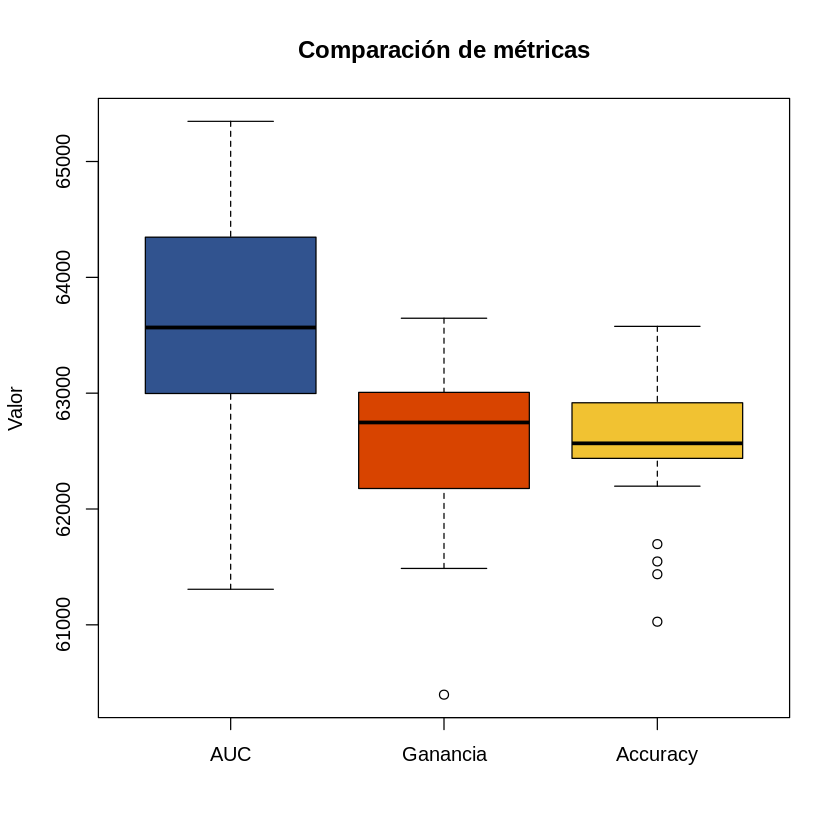

In [ ]:

############################################################
# 4) Test de Wilcoxon pareado entre todas las métricas
############################################################

cat("\n===== Test Wilcoxon: AUC vs Ganancia =====\n")
wilcox_auc_gan <- wilcox.test(
  datos_m$AUC, datos_m$Ganancia,
  paired = TRUE, alternative = "two.sided", exact = FALSE
)
print(wilcox_auc_gan)

cat("\n===== Test Wilcoxon: AUC vs Accuracy =====\n")
wilcox_auc_acc <- wilcox.test(
  datos_m$AUC, datos_m$Accuracy,
  paired = TRUE, alternative = "two.sided", exact = FALSE
)
print(wilcox_auc_acc)

cat("\n===== Test Wilcoxon: Ganancia vs Accuracy =====\n")
wilcox_gan_acc <- wilcox.test(
  datos_m$Ganancia, datos_m$Accuracy,
  paired = TRUE, alternative = "two.sided", exact = FALSE
)
print(wilcox_gan_acc)

############################################################
# 5) EXTRA: Boxplots comparativos
############################################################

boxplot(datos_m,
        main = "Comparación de métricas",
        ylab = "Valor",
        col = c("#31538f", "#d84400", "#f1c232"))


Por último, vamos a analizar qué tan costoso computacionalmente es utilizar una métrica personalizada a la hora de correr una Optimización Bayesiana, desde el punto de vista del tiempo promedio que cuesta correrla.

In [ ]:

library(ggplot2)
library(tidyverse)

df_acc <- read.table("exp_WFaccuracy_310019_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 310019) %>%
    bind_rows(read.table("exp_WFaccuracy_330017_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 330017)) %>%
    bind_rows(read.table("exp_WFaccuracy_320009_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 320009))

df_gan <- read.table("exp_WFganancia_310019_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 310019)  %>%
    bind_rows(read.table("exp_WFganancia_330017_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 330017)) %>%
    bind_rows(read.table("exp_WFganancia_320009_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 320009))

df_auc <- read.table("exp_WFauc_310019_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 310019)  %>%
    bind_rows(read.table("exp_WFauc_330017_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 330017)) %>%
    bind_rows(read.table("exp_WFauc_320009_BO_log.txt", header = TRUE, sep = "\t") %>%
  mutate(iteracion = seq(1:nrow(.)), semilla = 320009))


In [ ]:

options(scipen=99)

df_all <- df_acc %>% filter(dob > 0) %>%
  select(dob, semilla, accuracy = y, tiempo_acc = exec.time) %>%
  full_join(df_auc %>% filter(dob > 0) %>%
  select(dob, semilla, auc = y, tiempo_auc = exec.time), by=c("semilla", "dob"))%>%
  full_join(df_gan %>% filter(dob > 0) %>%
  select(dob, semilla, ganancia = y, tiempo_gan = exec.time), by=c("semilla", "dob"))



In [ ]:
promedio_semilla <- df_all %>%
  #pivot_longer(cols = c("tiempo_acc", "tiempo_gan", "tiempo_auc")) %>%
  group_by(semilla) %>%
  summarise(tiempo_acc = sum(tiempo_acc, na.rm=T),
            tiempo_gan = sum(tiempo_gan, na.rm=T),
            tiempo_auc = sum(tiempo_auc, na.rm=T))
print(promedio_semilla)

promedio_semilla %>%
  mutate(tiempo_acc = ifelse(tiempo_acc == 0, NA, tiempo_acc)) %>%
  summarise(tiempo_acc = mean(tiempo_acc, na.rm=T)/60,
            tiempo_gan = mean(tiempo_gan, na.rm=T)/60,
            tiempo_auc = mean(tiempo_auc, na.rm=T)/60)



# A tibble: 3 × 4
  semilla tiempo_acc tiempo_gan tiempo_auc
    <dbl>      <dbl>      <dbl>      <dbl>
1  310019     10729.      4160.      5247.
2  320009      8679.      8493.      8394.
3  330017      8609.     10184.     10691.


tiempo_acc,tiempo_gan,tiempo_auc
<dbl>,<dbl>,<dbl>
155.6493,126.8705,135.1778
